In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
standard = pd.read_csv("MergeSort.csv")
hybrid = pd.read_csv("MergeInsertionSort.csv")

standard.head(), hybrid.head()

(     type    n  threshold   usec
 0  random  500          0  125.8
 1  random  600          0  155.4
 2  random  700          0  176.0
 3  random  800          0  199.8
 4  random  900          0  231.0,
      type    n  threshold   usec
 0  random  500          5   82.6
 1  random  600          5   92.4
 2  random  700          5  116.0
 3  random  800          5  148.2
 4  random  900          5  164.2)

In [12]:
def plot_group(df, title, add_threshold=False):
    array_types = df['type'].unique()

    for arr in array_types:
        subset = df[df['type'] == arr]

        plt.figure(figsize=(10, 5))
        plt.title(f"{title} — {arr}")
        plt.xlabel("Размер массива n")
        plt.ylabel("Время (мкс)")

        if add_threshold:
            thresholds = sorted(subset['threshold'].unique())
            for th in thresholds:
                sub2 = subset[subset['threshold'] == th]
                plt.plot(sub2['n'], sub2['usec'], label=f"threshold={th}")
        else:
            plt.plot(subset['n'], subset['usec'], label="merge sort")

        plt.legend()
        plt.grid(True)
        plt.show()

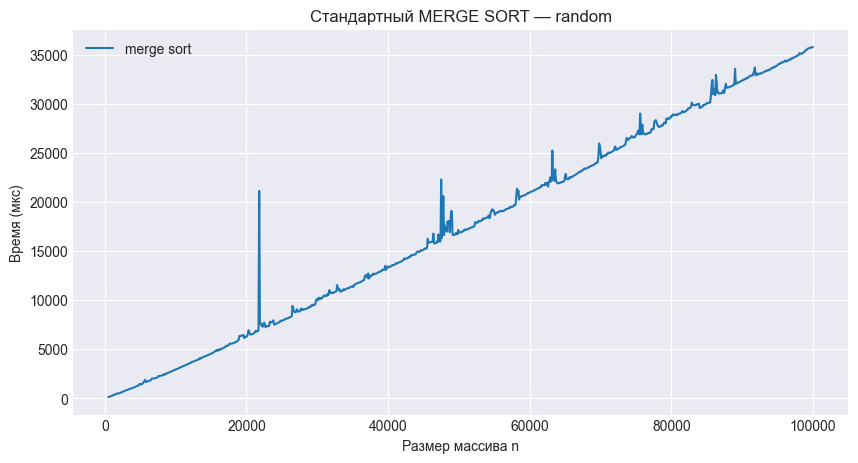

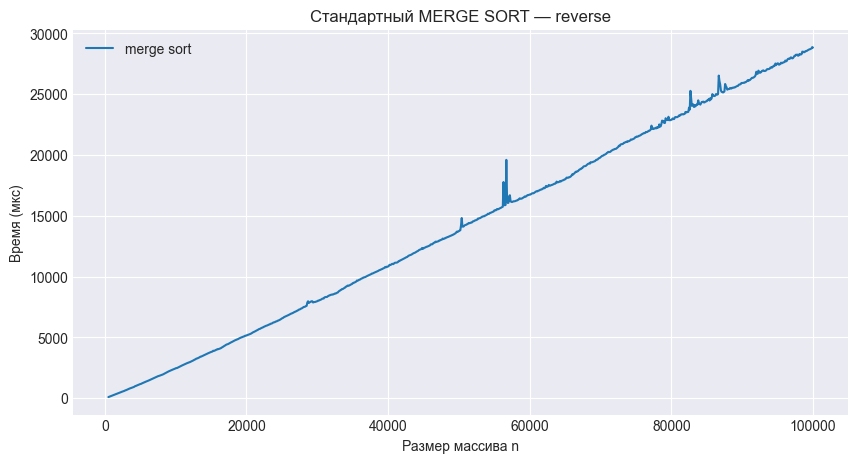

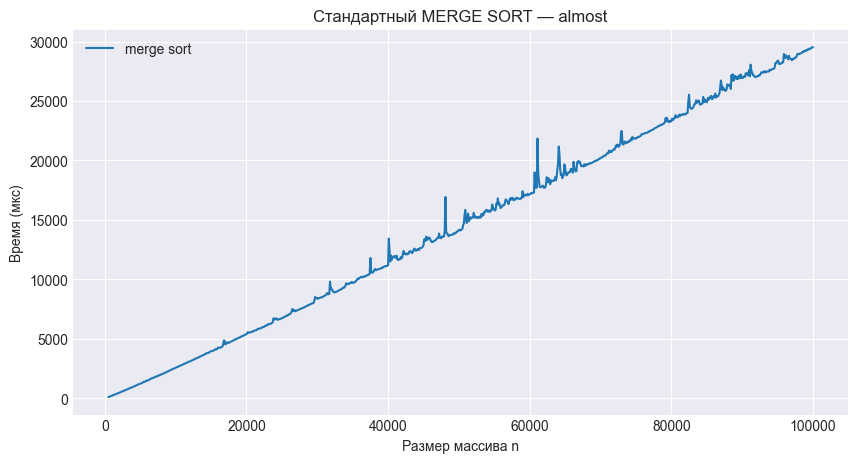

In [13]:
plot_group(standard, "Стандартный MERGE SORT", add_threshold=False)

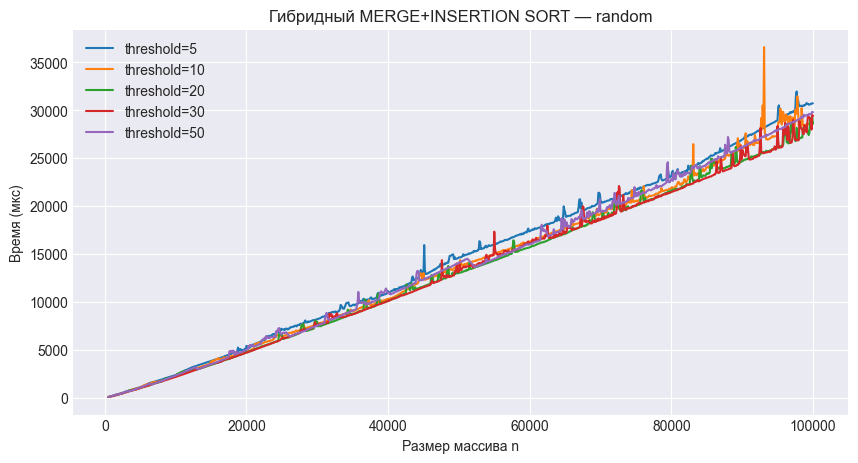

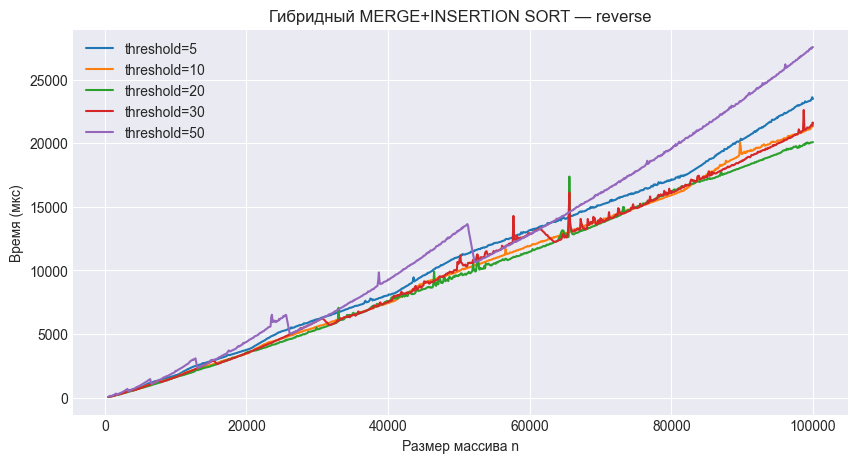

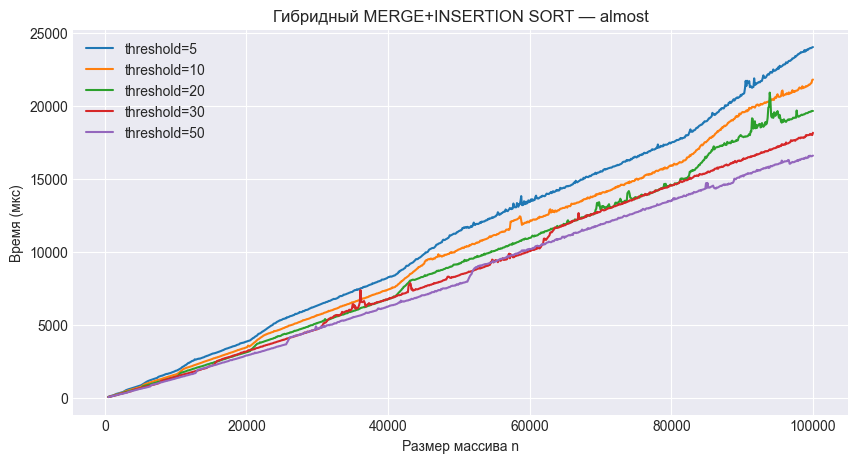

In [14]:
plot_group(hybrid, "Гибридный MERGE+INSERTION SORT", add_threshold=True)

In [15]:
hybrid_grouped = hybrid.groupby("threshold")["usec"].mean()
hybrid_grouped

threshold
5     12223.483936
10    11346.670817
20    10816.787818
30    10774.421352
50    11419.607497
Name: usec, dtype: float64

In [16]:
best_threshold = hybrid_grouped.idxmin()
best_threshold

30

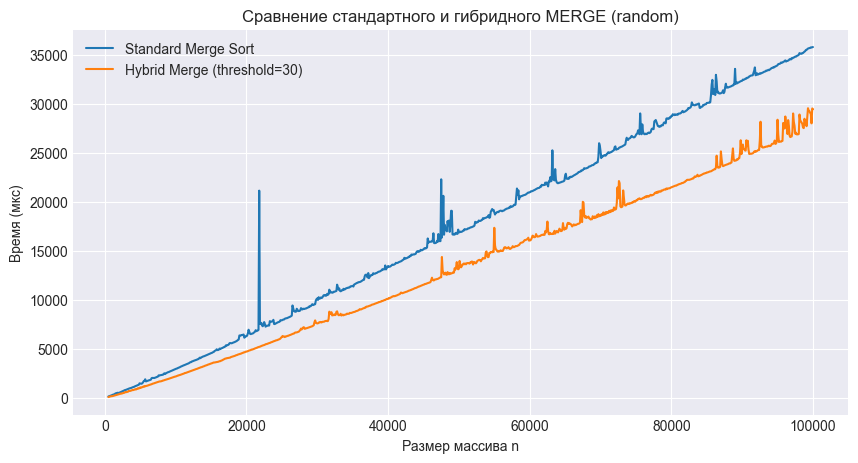

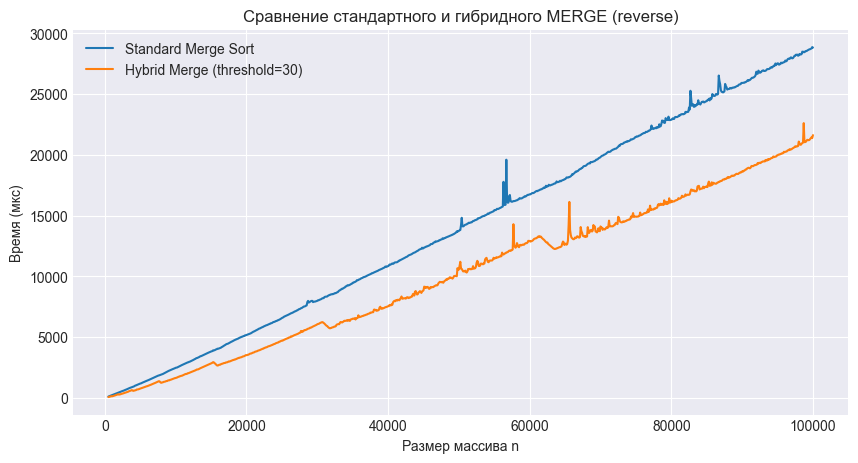

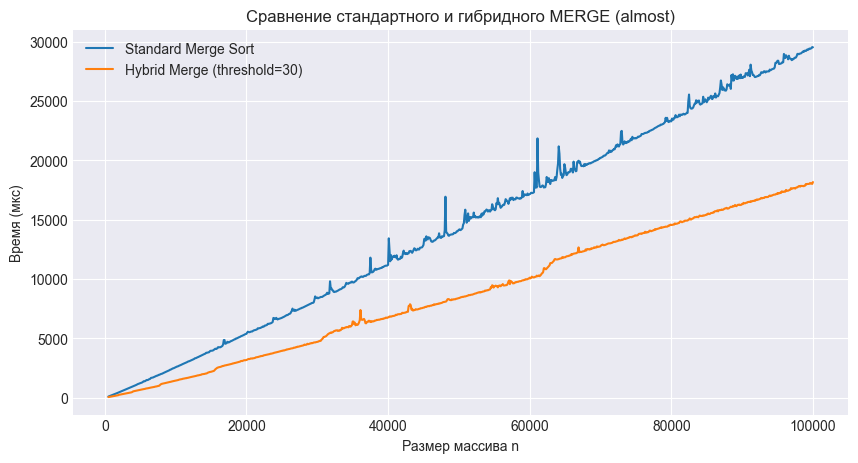

In [17]:
def plot_compare_best(standard, hybrid, best_threshold):
    arr_types = standard['type'].unique()

    for arr in arr_types:
        s = standard[standard['type'] == arr]
        h = hybrid[(hybrid['type'] == arr) & (hybrid['threshold'] == best_threshold)]

        plt.figure(figsize=(10,5))
        plt.title(f"Сравнение стандартного и гибридного MERGE ({arr})")
        plt.plot(s['n'], s['usec'], label="Standard Merge Sort")
        plt.plot(h['n'], h['usec'], label=f"Hybrid Merge (threshold={best_threshold})")
        plt.xlabel("Размер массива n")
        plt.ylabel("Время (мкс)")
        plt.legend()
        plt.grid(True)
        plt.show()

plot_compare_best(standard, hybrid, best_threshold)

# Вывод
Гибридная версия MERGE+INSERTION SORT во всех проведённых экспериментах стабильно показывала меньшие временные затраты по сравнению со стандартной реализацией MERGE SORT.